# **Parkinson's_Disease_Detection**

**Importing** **the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


**Data** Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('parkinsons.csv')

In [ ]:
# printing the first 5 rows of the dataframe
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
df.shape

(195, 24)

In [ ]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [ ]:
# getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
df['status'].value_counts()

,count
status,
1,147
0,48


1  --> Parkinson's Positive

0 --> Healthy


In [ ]:
# grouping the data based on the target variable and calculating the mean for numerical columns only
numerical_df = df.select_dtypes(include=['number'])
# Select columns with numerical data types
df.groupby('status')[numerical_df.columns].mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.678750,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


**Data** **Pre-Processing**

In [ ]:
X = df.drop(columns=['name','status'], axis=1)
Y =df['status']

In [ ]:
print(X.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


**Splitting the data to training data & Test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
model = LogisticRegression()

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8205128205128205


In [ ]:
# Replace y_test and y_pred with Y_test and X_test_prediction
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=2)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


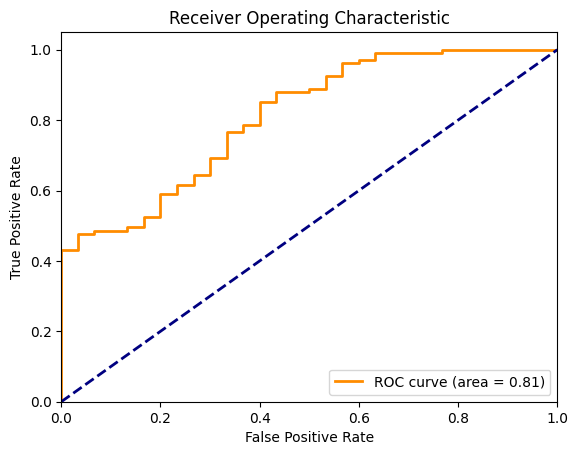

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is your Logistic Regression model
# Fit the model before predicting probabilities (if not already fitted)
model.fit(X_train, Y_train)  # Fit the model with your training data

Y_scores = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# **K-Nearest Neighbors (KNN)**

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Predictions on training data
X_train_prediction_knn = knn_model.predict(X_train)
training_data_accuracy_knn = accuracy_score(Y_train, X_train_prediction_knn)
print('Accuracy score of training data (KNN): ', training_data_accuracy_knn)

# Predictions on test data
X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(Y_test, X_test_prediction_knn)
print('Accuracy score of test data (KNN): ', test_data_accuracy_knn)

# Classification report for KNN
print(classification_report(Y_test, X_test_prediction_knn))

Accuracy score of training data (KNN):  0.9137931034482759
Accuracy score of test data (KNN):  0.8175182481751825
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        30
           1       0.89      0.88      0.88       107

    accuracy                           0.82       137
   macro avg       0.73      0.74      0.74       137
weighted avg       0.82      0.82      0.82       137



In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_visual = X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']]
X_train_visual, X_test_visual, Y_train_visual, Y_test_visual = train_test_split(X_visual, Y, test_size=0.2, random_state=2)
scaler_visual = StandardScaler()
X_train_visual = scaler_visual.fit_transform(X_train_visual)
X_test_visual = scaler_visual.transform(X_test_visual)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_visual = KNeighborsClassifier(n_neighbors=5)
knn_model_visual.fit(X_train_visual, Y_train_visual)

KNeighborsClassifier()

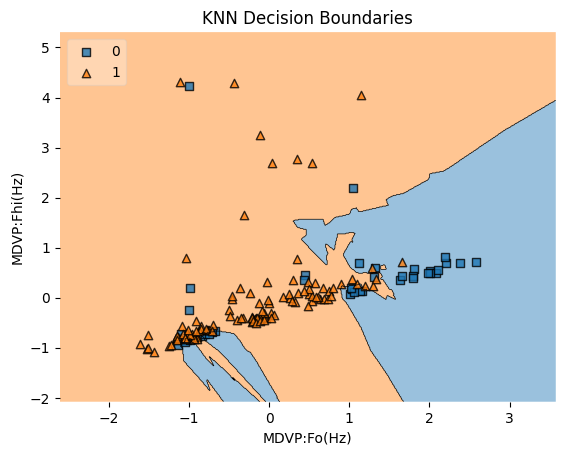

In [ ]:
plot_decision_regions(X_train_visual, Y_train_visual.values, clf=knn_model_visual, legend=2)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('KNN Decision Boundaries')
plt.show()

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=2)
# Train the model
tree_model.fit(X_train, Y_train)

# Predictions on training data
X_train_prediction_tree = tree_model.predict(X_train)
training_data_accuracy_tree = accuracy_score(Y_train, X_train_prediction_tree)
print('Accuracy score of training data (Decision Tree): ', training_data_accuracy_tree)

# Predictions on test data
X_test_prediction_tree = tree_model.predict(X_test)
test_data_accuracy_tree = accuracy_score(Y_test, X_test_prediction_tree)
print('Accuracy score of test data (Decision Tree): ', test_data_accuracy_tree)

# Classification report for Decision Tree
print(classification_report(Y_test, X_test_prediction_tree))

Accuracy score of training data (Decision Tree):  1.0
Accuracy score of test data (Decision Tree):  0.7883211678832117
              precision    recall  f1-score   support

           0       0.52      0.43      0.47        30
           1       0.85      0.89      0.87       107

    accuracy                           0.79       137
   macro avg       0.68      0.66      0.67       137
weighted avg       0.78      0.79      0.78       137



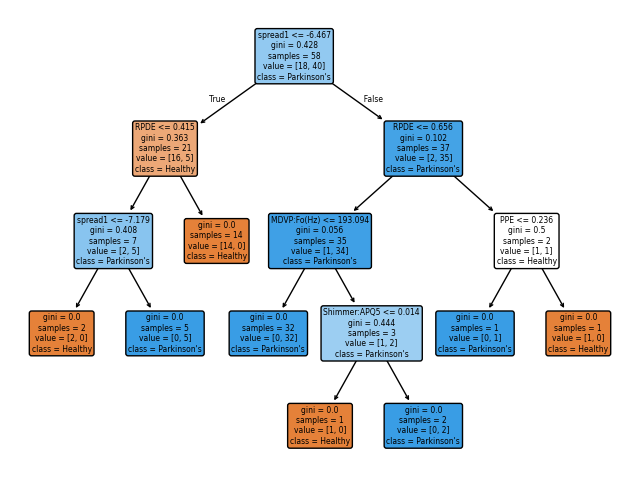

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['Healthy', 'Parkinson\'s'],
          filled=True,
          rounded=True)
plt.show()

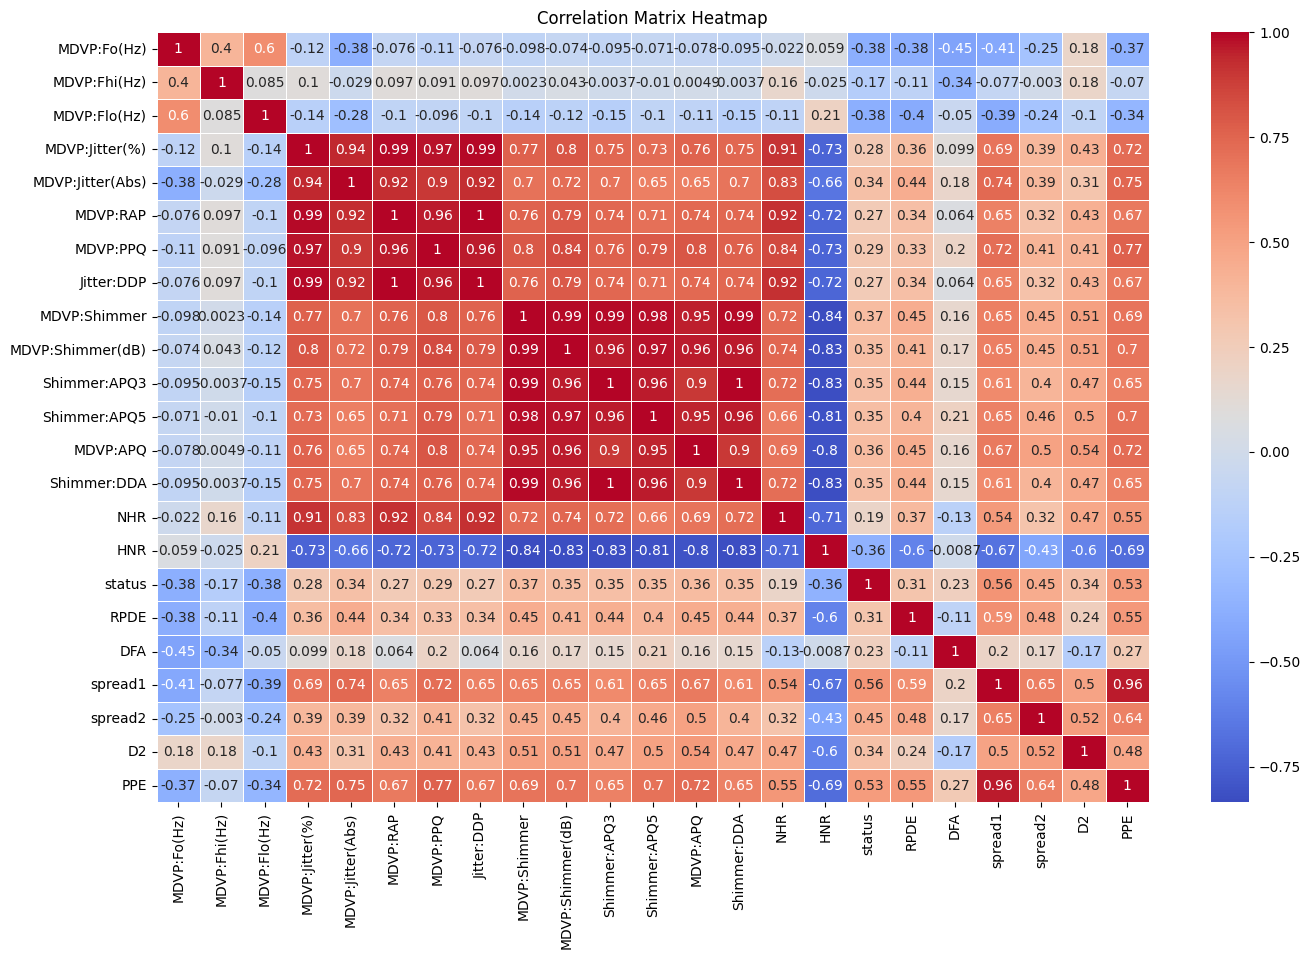

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix, excluding the 'name' column
correlation_matrix = df.drop(columns=['name']).corr()

# Create the heatmap
plt.figure(figsize=(16, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Support Vector Machines (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, Y_train)

# Predictions on test data
Y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8759124087591241
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.88      0.97      0.92       107

    accuracy                           0.88       137
   macro avg       0.86      0.75      0.79       137
weighted avg       0.87      0.88      0.87       137



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a poly kernel
svm_model = SVC(kernel='poly',degree=4)

# Train the model
svm_model.fit(X_train, Y_train)

# Predictions on test data
Y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8175182481751825
              precision    recall  f1-score   support

           0       0.69      0.30      0.42        30
           1       0.83      0.96      0.89       107

    accuracy                           0.82       137
   macro avg       0.76      0.63      0.66       137
weighted avg       0.80      0.82      0.79       137



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a rbf kernel
svm_model = SVC(kernel='rbf')

# Train the model
svm_model.fit(X_train, Y_train)

# Predictions on test data
Y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8248175182481752
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        30
           1       0.83      0.97      0.90       107

    accuracy                           0.82       137
   macro avg       0.79      0.64      0.66       137
weighted avg       0.81      0.82      0.79       137



SVM with RBF Kernel and Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 'scale', 'auto'],
              'kernel': ['rbf']}

# Initialize the SVM model with an RBF kernel
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Train the model using GridSearchCV
grid_search.fit(X_train, Y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predictions on test data using the best model
Y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8248175182481752
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        30
           1       0.83      0.97      0.90       107

    accuracy                           0.82       137
   macro avg       0.79      0.64      0.66       137
weighted avg       0.81      0.82      0.79       137



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM model with a sigmoid kernel
svm_model = SVC(kernel='sigmoid')

# Train the model
svm_model.fit(X_train, Y_train)

# Predictions on test data
Y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.781021897810219
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.78      1.00      0.88       107

    accuracy                           0.78       137
   macro avg       0.39      0.50      0.44       137
weighted avg       0.61      0.78      0.68       137



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


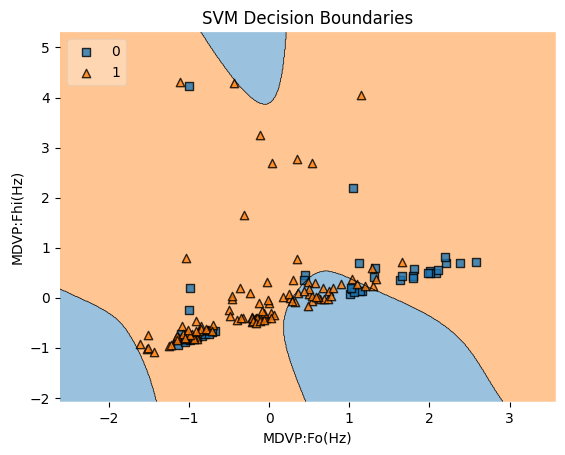

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Assuming you have X_train, X_test, Y_train, Y_test, and svm_model (trained SVM model)

# Select two features for visualization (e.g., 'MDVP:Fo(Hz)' and 'MDVP:Fhi(Hz)')
X_visual = X[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']]
X_train_visual, X_test_visual, Y_train_visual, Y_test_visual = train_test_split(X_visual, Y, test_size=0.2, random_state=2)

# Standardize the data for visualization (if not already done)
scaler_visual = StandardScaler()
X_train_visual = scaler_visual.fit_transform(X_train_visual)
X_test_visual = scaler_visual.transform(X_test_visual)

# Retrain the SVM model with the selected features for visualization
svm_model_visual = SVC(kernel='sigmoid')  # Or your preferred kernel
svm_model_visual.fit(X_train_visual, Y_train_visual) # Train with visual data


# Plot decision boundaries using mlxtend's plot_decision_regions
# Use svm_model_visual instead of svm_model
plot_decision_regions(X_train_visual, Y_train_visual.values, clf=svm_model_visual, legend=2)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('SVM Decision Boundaries')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Assuming you have X_train and X_test

# Initialize PCA with desired number of components
pca = PCA(n_components=10)  # Choose the number of components you want

# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now use X_train_pca and X_test_pca with your SVM model

In [ ]:
from sklearn.svm import SVC

# Assuming you have X_train, Y_train

# Calculate class weights
class_weights = {0: 1, 1: 3}  # Adjust weights as needed

# Initialize SVM with class weights
svm_model = SVC(kernel='rbf', class_weight=class_weights)

# Train the model
svm_model.fit(X_train, Y_train)

SVC(class_weight={0: 1, 1: 3})

In [ ]:
from sklearn.svm import SVC

# Initialize SVM with probability estimates
svm_model = SVC(kernel='rbf', probability=True)

# Train the model
svm_model.fit(X_train, Y_train)

# Get probability estimates for test data
probabilities = svm_model.predict_proba(X_test)

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Define a custom kernel function (example: Gaussian kernel)
def gaussian_kernel(X1, X2, sigma=1.0):

    # Convert Pandas DataFrames to NumPy arrays if needed
    X1 = X1.to_numpy() if isinstance(X1, pd.DataFrame) else X1
    X2 = X2.to_numpy() if isinstance(X2, pd.DataFrame) else X2

    n_samples_1 = X1.shape[0]
    n_samples_2 = X2.shape[0]
    kernel_matrix = np.zeros((n_samples_1, n_samples_2))

    for i in range(n_samples_1):
        for j in range(n_samples_2):
            kernel_matrix[i, j] = np.exp(
                -np.linalg.norm(X1[i] - X2[j])**2 / (2 * (sigma ** 2))
            )

    return kernel_matrix  # Return the kernel matrix

# Initialize SVM with the custom kernel
svm_model = SVC(kernel=gaussian_kernel)

# Train the model
svm_model.fit(X_train, Y_train)

SVC(kernel=<function gaussian_kernel at 0x7a6c743df420>)

In [ ]:
from sklearn.svm import OneClassSVM

# Initialize One-Class SVM
ocsvm_model = OneClassSVM(nu=0.1)  # Adjust nu as needed

# Train the model on healthy data
ocsvm_model.fit(X_train[Y_train == 0])  # Train on data with status 0 (healthy)

# Predict anomalies on test data
predictions = ocsvm_model.predict(X_test)  #

# **K-Means Clustering**

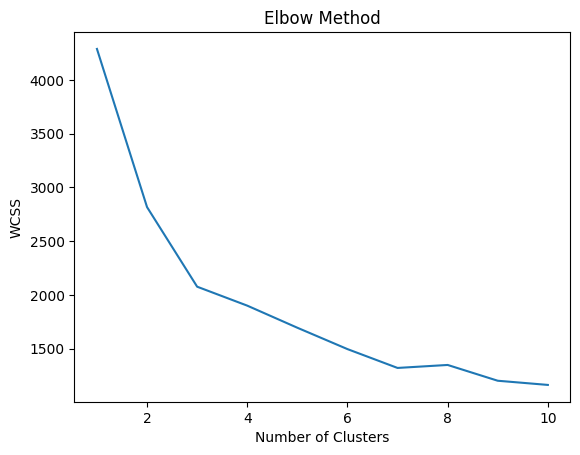

         MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
cluster                                                            
0         135.524766    163.970026     94.936805        0.007045   
1         166.785019    215.052962    129.865689        0.003901   
2         163.330500    251.179417    133.950500        0.021417   

         MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
cluster                                                                   
0                0.000055  0.003713  0.003986    0.011139      0.039505   
1                0.000025  0.001947  0.002093    0.005841      0.017342   
2                0.000137  0.012707  0.011944    0.038123      0.076097   

         MDVP:Shimmer(dB)  ...       NHR        HNR    status      RPDE  \
cluster                    ...                                            
0                0.370260  ...  0.027473  19.327727  0.974026  0.568655   
1                0.159708  ...  0.009222  24.803509  0.566

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your data in a Pandas DataFrame called 'df'
# and you've already performed data preprocessing (e.g., handling missing values)

# Select the features for clustering (exclude 'name' and 'status')
X = df.drop(columns=['name', 'status'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try different numbers of clusters (1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
n_clusters = 3  # Adjust based on the Elbow method graph

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels
numerical_cols = df.select_dtypes(include=['number']).columns
cluster_means = df.groupby('cluster')[numerical_cols].mean()
print(cluster_means)


# **Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data in a Pandas DataFrame called 'df'
# and you've already performed data preprocessing (e.g., handling missing values)

# Select features (X) and target (Y)
X = df.drop(columns=['name', 'status'])  # Features
Y = df['status']  # Target variable

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           0       0.38      0.86      0.52         7
           1       0.96      0.69      0.80        32

    accuracy                           0.72        39
   macro avg       0.67      0.77      0.66        39
weighted avg       0.85      0.72      0.75        39



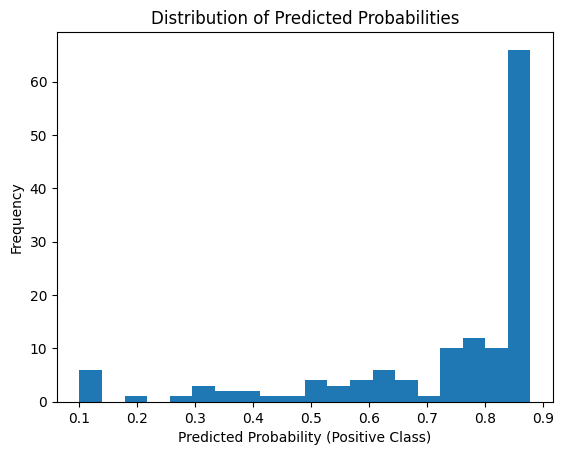

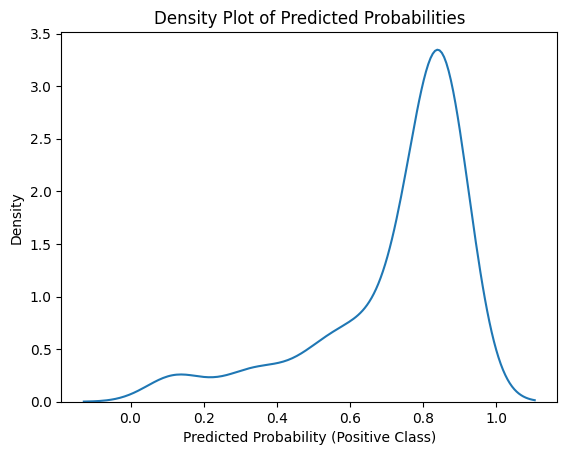

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of Predicted Probabilities
# Assuming you have Y_test and probabilities (from predict_proba)

# Get predicted probabilities for the positive class (class 1)
probs_positive = probabilities[:, 1]

# Plot histogram of predicted probabilities
plt.hist(probs_positive, bins=20)
plt.xlabel('Predicted Probability (Positive Class)')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

# Alternatively, you can use a density plot
sns.kdeplot(probs_positive)
plt.xlabel('Predicted Probability (Positive Class)')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Probabilities')
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np

# Define a custom kernel function (example: Gaussian kernel)
def gaussian_kernel(X1, X2, sigma=1.0):

    # Convert Pandas DataFrames to NumPy arrays if needed
    X1 = X1.to_numpy() if isinstance(X1, pd.DataFrame) else X1
    X2 = X2.to_numpy() if isinstance(X2, pd.DataFrame) else X2

    # Calculate pairwise distances between all samples in X1 and X2
    distances = np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :]) ** 2, axis=2)

    # Apply the Gaussian kernel formula
    kernel_matrix = np.exp(-distances / (2 * (sigma ** 2)))

    return kernel_matrix

# Initialize SVM with the custom kernel
svm_model = SVC(kernel=gaussian_kernel)

# Train the model
svm_model.fit(X_train, Y_train)

SVC(kernel=<function gaussian_kernel at 0x7a6c743cae80>)

# **GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=2)

# Train the model
gb_model.fit(X_train, Y_train)

# Predictions on training data
X_train_prediction_gb = gb_model.predict(X_train)
training_data_accuracy_gb = accuracy_score(Y_train, X_train_prediction_gb)
print('Accuracy score of training data (Gradient Boosting): ', training_data_accuracy_gb)

# Predictions on test data
X_test_prediction_gb = gb_model.predict(X_test)
test_data_accuracy_gb = accuracy_score(Y_test, X_test_prediction_gb)
print('Accuracy score of test data (Gradient Boosting): ', test_data_accuracy_gb)

# Classification report for Gradient Boosting
print(classification_report(Y_test, X_test_prediction_gb))

Accuracy score of training data (Gradient Boosting):  1.0
Accuracy score of test data (Gradient Boosting):  0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



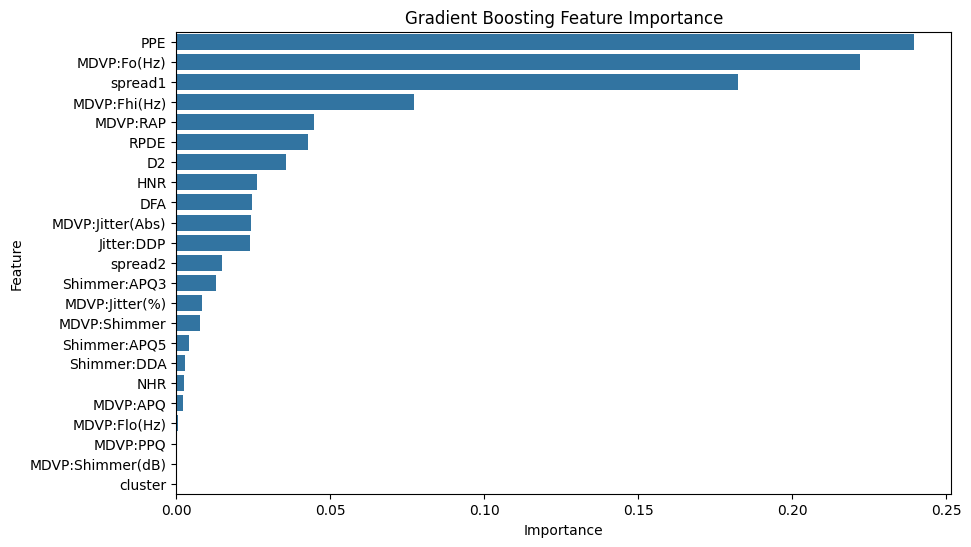

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
# Import from sklearn.inspection instead of sklearn.ensemblerom sklearn.inspection import partial_dependence, plot_partial_dependence


feature_importances = gb_model.feature_importances_

# Get feature names used during model training (if different from X.columns)
feature_names = gb_model.feature_names_in_  # Assuming gb_model has this attribute

# Create DataFrame with correct feature names and importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.show()

# **PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the original dataset (replace 'parkinsons.csv' with your file path)
df = pd.read_csv('parkinsons.csv')

# Separate features (X) and target (Y)
X = df.drop(columns=['name', 'status'])
Y = df['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(weights='distance')  # Using weighted voting
knn_model.fit(X_scaled, Y)

# Function to predict based on user input
def predict_parkinsons():
    """Predicts Parkinson's disease based on user input.

    Returns:
        str: A message indicating whether the person has Parkinson's or not.
    """
    input_data = []
    for feature in X.columns:  # Get input for each feature
        while True:  # Keep prompting until a valid input is received
            try:
                value = float(input(f"Enter value for {feature}: "))
                input_data.append(value)
                break  # Exit the loop if input is valid
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    # Convert input data to a NumPy array and reshape
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Standardize the input data
    std_data = scaler.transform(input_data_reshaped)

    # Make the prediction using the KNN model
    prediction = knn_model.predict(std_data)

    # Print the prediction result1111
    if prediction[0] == 0:
        return "The Person does not have Parkinsons Disease"
    else:
        return "The Person has Parkinsons"

# Get prediction from user input
result = predict_parkinsons()
print(result)

Enter value for MDVP:Fo(Hz): 1
Enter value for MDVP:Fhi(Hz): 0
Enter value for MDVP:Flo(Hz): 1
Enter value for MDVP:Jitter(%): 1
Enter value for MDVP:Jitter(Abs): 1
Enter value for MDVP:RAP: 
Invalid input. Please enter a numerical value.
Enter value for MDVP:RAP: 0
Enter value for MDVP:PPQ: 1
Enter value for Jitter:DDP: 
Invalid input. Please enter a numerical value.
Enter value for Jitter:DDP: 1
Enter value for MDVP:Shimmer: 1
Enter value for MDVP:Shimmer(dB): 1
Enter value for Shimmer:APQ3: 1
Enter value for Shimmer:APQ5: 1
Enter value for MDVP:APQ: 1
Enter value for Shimmer:DDA: 1
Enter value for NHR: 
Invalid input. Please enter a numerical value.
Enter value for NHR: 
Invalid input. Please enter a numerical value.
Enter value for NHR: 
Invalid input. Please enter a numerical value.
Enter value for NHR: 1
Enter value for HNR: 
Invalid input. Please enter a numerical value.
Enter value for HNR: 
Invalid input. Please enter a numerical value.
Enter value for HNR: 1
Enter value for R

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the original dataset (replace 'parkinsons.csv' with your file path)
df = pd.read_csv('parkinsons.csv')

# Separate features (X) and target (Y)
X = df.drop(columns=['name', 'status'])
Y = df['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(weights='distance')  # Using weighted voting
knn_model.fit(X_scaled, Y)

# Function to predict based on user input with default values and ranges
def predict_parkinsons():
    """Predicts Parkinson's disease based on user input.

    Returns:
        str: A message indicating whether the person has Parkinson's or not.
    """
    input_data = []

    # Define default values and ranges for each feature
    feature_defaults_and_ranges = {
        'MDVP:Fo(Hz)': (100, 250, 150),  # (min, max, default)
        'MDVP:Fhi(Hz)': (100, 300, 200),
        'MDVP:Flo(Hz)': (60, 150, 100),
        'MDVP:Jitter(%)': (0.001, 0.02, 0.005),
        'MDVP:Jitter(Abs)': (0.00001, 0.0001, 0.00005),
        'MDVP:RAP': (0.001, 0.01, 0.005),
        'MDVP:PPQ': (0.001, 0.01, 0.005),
        'Jitter:DDP': (0.001, 0.03, 0.015),
        'MDVP:Shimmer': (0.01, 0.1, 0.05),
        'MDVP:Shimmer(dB)': (0.1, 1.5, 0.75),
        'Shimmer:APQ3': (0.001, 0.01, 0.005),
        'Shimmer:APQ5': (0.001, 0.01, 0.005),
        'MDVP:APQ': (0.001, 0.01, 0.005),
        'Shimmer:DDA': (0.001, 0.03, 0.015),
        'NHR': (0.001, 0.1, 0.05),
        'HNR': (10, 35, 22.5),
        'RPDE': (0.2, 0.8, 0.5),
        'DFA': (0.5, 0.8, 0.65),
        'spread1': (-8, 0, -4),
        'spread2': (0.0, 0.5, 0.25),
        'D2': (1.0, 3.0, 2.0),
        'PPE': (0.0, 0.5, 0.25)
    }

    for feature in X.columns:
        min_val, max_val, default_val = feature_defaults_and_ranges[feature]
        while True:
            try:
                value = float(input(f"Enter value for {feature} (range: {min_val}-{max_val}, default: {default_val}): ") or default_val)
                if min_val <= value <= max_val:
                    input_data.append(value)
                    break
                else:
                    print(f"Value must be within the range {min_val}-{max_val}.")
            except ValueError:
                print("Invalid input. Please enter a numerical value.")

    # ... (rest of the function remains the same)

# Get prediction from user input
result = predict_parkinsons()
print(result)

Enter value for MDVP:Fo(Hz) (range: 100-250, default: 150): 150
Enter value for MDVP:Fhi(Hz) (range: 100-300, default: 200): 200
Enter value for MDVP:Flo(Hz) (range: 60-150, default: 100): 100
Enter value for MDVP:Jitter(%) (range: 0.001-0.02, default: 0.005): 0.005
Enter value for MDVP:Jitter(Abs) (range: 1e-05-0.0001, default: 5e-05): 5e-05
Enter value for MDVP:RAP (range: 0.001-0.01, default: 0.005): 0.005
Enter value for MDVP:PPQ (range: 0.001-0.01, default: 0.005): 0.005
Enter value for Jitter:DDP (range: 0.001-0.03, default: 0.015): 0.015
Enter value for MDVP:Shimmer (range: 0.01-0.1, default: 0.05): 0.05
Enter value for MDVP:Shimmer(dB) (range: 0.1-1.5, default: 0.75): 0.75
Enter value for Shimmer:APQ3 (range: 0.001-0.01, default: 0.005): 0.005
Enter value for Shimmer:APQ5 (range: 0.001-0.01, default: 0.005): 0.005
Enter value for MDVP:APQ (range: 0.001-0.01, default: 0.005): 0.005
Enter value for Shimmer:DDA (range: 0.001-0.03, default: 0.015): 0.015
Enter value for NHR (range:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('parkinsons.csv')



In [ ]:
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']

In [ ]:
def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name, split_ratio):
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Return the predictions for use outside the function
    return Y_train_pred, Y_test_pred

model = LogisticRegression()
model_name = "Logistic Regression"
split_ratio = "0.2"

# Call the function to train and evaluate, and get predictions
_, Y_test_pred = train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name, split_ratio)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cm = confusion_matrix(Y_test, Y_test_pred)
print(f"\nConfusion Matrix for {model_name} ({split_ratio} split):")
print(cm)


Confusion Matrix for Logistic Regression (0.2 split):
[[ 13  17]
 [  7 100]]


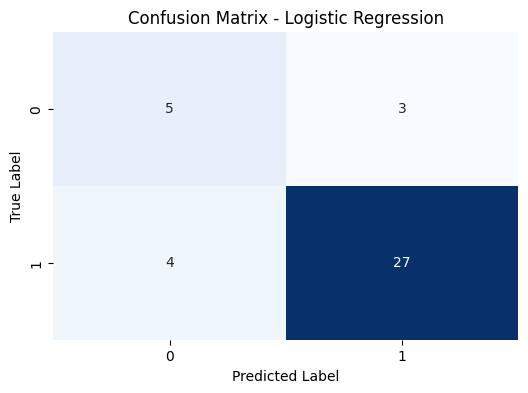

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



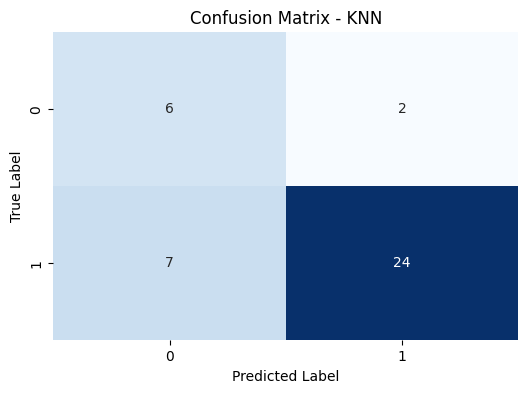

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39



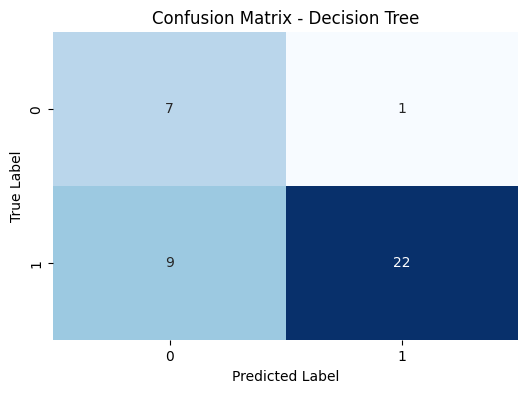

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



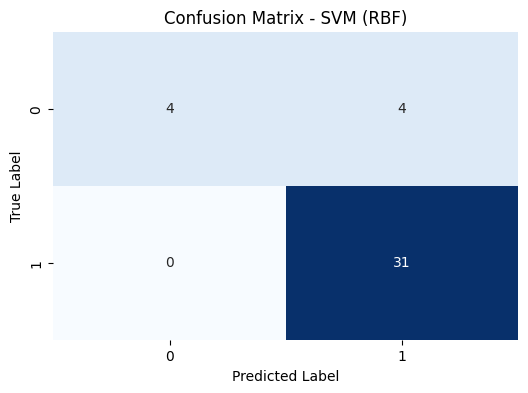

Classification Report for SVM (RBF):
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



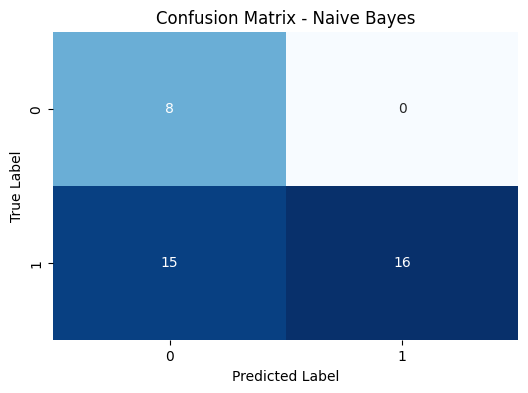

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.35      1.00      0.52         8
           1       1.00      0.52      0.68        31

    accuracy                           0.62        39
   macro avg       0.67      0.76      0.60        39
weighted avg       0.87      0.62      0.65        39



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset
df = pd.read_csv('/content/sample_data/parkinsons.csv')
X = df.drop(columns=['name', 'status'], axis=1)
Y = df['status']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB()
}

# Function to train, predict, and plot confusion matrix
def evaluate_model(model, model_name):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, Y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print(f"Classification Report for {model_name}:\n", classification_report(Y_test, Y_pred))

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=2),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": gb_model()
}

In [ ]:
results_80_20 = {}
results_70_30 = {}

In [ ]:
def train_and_evaluate_model(model, X_train, X_test, Y_train, Y_test, model_name, split_ratio):
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    report = classification_report(Y_test, Y_test_pred) # Calculate the classification report

    # Return all three values: train_accuracy, test_accuracy, and report
    return train_accuracy, test_accuracy, report

In [ ]:
X_train_70, X_test_30, Y_train_70, Y_test_30 = train_test_split(X, Y, test_size=0.3, random_state=2)
scaler_70 = StandardScaler()
X_train_70_scaled = scaler_70.fit_transform(X_train_70)
X_test_30_scaled = scaler_70.transform(X_test_30)

print("\n--- 70-30 Split Results ---")
for name, model in models.items():
    train_acc, test_acc, report = train_and_evaluate_model(model, X_train_70_scaled, X_test_30_scaled,
                                                           Y_train_70, Y_test_30, name, "70-30")
    results_70_30[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    print(f"{name} - Test Classification Report:\n{report}")


--- 70-30 Split Results ---
Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.87      0.85      0.86        47

    accuracy                           0.78        59
   macro avg       0.67      0.68      0.67        59
weighted avg       0.79      0.78      0.78        59

KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.98      0.89      0.93        47

    accuracy                           0.90        59
   macro avg       0.83      0.91      0.86        59
weighted avg       0.92      0.90      0.90        59

Decision Tree - Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.92      0.61        12
           1       0.97      0.72      0.83        47

    accuracy             

In [ ]:
X_train_80, X_test_20, Y_train_80, Y_test_20 = train_test_split(X, Y, test_size=0.2, random_state=2)
scaler_80 = StandardScaler()
X_train_80_scaled = scaler_80.fit_transform(X_train_80)
X_test_20_scaled = scaler_80.transform(X_test_20)

print("\n--- 80-20 Split Results ---")
for name, model in models.items():
    train_acc, test_acc, report = train_and_evaluate_model(model, X_train_80_scaled, X_test_20_scaled,
                                                           Y_train_80, Y_test_20, name, "80-20")
    results_80_20[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    print(f"{name} - Test Classification Report:\n{report}")



--- 80-20 Split Results ---
Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39

KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39

Decision Tree - Test Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy             

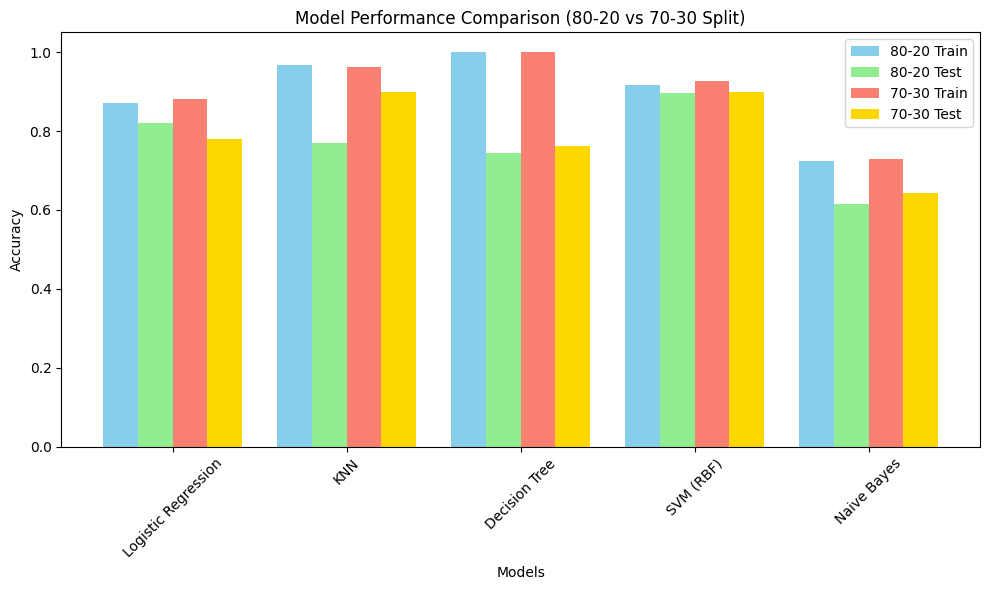

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_names = list(results_80_20.keys())

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": model_names,
    "80-20 Train Accuracy": [results_80_20[model]["Train Accuracy"] for model in model_names],
    "80-20 Test Accuracy": [results_80_20[model]["Test Accuracy"] for model in model_names],
    "70-30 Train Accuracy": [results_70_30[model]["Train Accuracy"] for model in model_names],
    "70-30 Test Accuracy": [results_70_30[model]["Test Accuracy"] for model in model_names]
})

# Now you can use 'comparison_df' in your plotting code:
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(models))

plt.bar(index, comparison_df["80-20 Train Accuracy"], bar_width, label='80-20 Train', color='skyblue')
plt.bar(index + bar_width, comparison_df["80-20 Test Accuracy"], bar_width, label='80-20 Test', color='lightgreen')
plt.bar(index + 2 * bar_width, comparison_df["70-30 Train Accuracy"], bar_width, label='70-30 Train', color='salmon')
plt.bar(index + 3 * bar_width, comparison_df["70-30 Test Accuracy"], bar_width, label='70-30 Test', color='gold')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison (80-20 vs 70-30 Split)')
plt.xticks(index + 1.5 * bar_width, comparison_df["Model"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from graphviz import Digraph
dot = Digraph(comment='Machine Learning Workflow', format='png')
dot.attr(rankdir='TB', size='8,10')  # Top-to-Bottom layout

# Define nodes
dot.node('A', 'Start')
dot.node('B', 'Load Dataset\n(parkinsons.csv)')
dot.node('C', 'Preprocess Data\n- Drop "name", "status"\n- Assign "status" to Y')
dot.node('D', 'Split Data')
dot.node('E', '80-20 Split\n80% Train, 20% Test')
dot.node('F', '70-30 Split\n70% Train, 30% Test')
dot.node('G', 'Scale Features\n(StandardScaler)')
dot.node('H', 'Train Models\n- Logistic Regression\n- KNN\n- Decision Tree\n- SVM (RBF)\n- Naive Bayes')
dot.node('I', 'Evaluate Models\n- Compute Accuracy\n- Generate Confusion Matrix\n- Plot Confusion Matrix')
dot.node('J', 'Compare Results\n- Create Comparison Table\n- Plot Bar Chart')
dot.node('K', 'End')

# Define edges
dot.edges(['AB', 'BC', 'CD'])
dot.edge('D', 'E', label='Option 1')
dot.edge('D', 'F', label='Option 2')
dot.edge('E', 'G')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('I', 'J')
dot.edge('J', 'K')

# Render and save the flowchart
dot.render('flowchart', view=True)  # Saves as 'flowchart.png' and opens it
print("\nFlowchart saved as 'flowchart.png' in the current directory.")


Flowchart saved as 'flowchart.png' in the current directory.
